In [5]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [6]:
num_cust = '100cust'
rate_name = 'rate1'
# RATE_NAMES = ['rate1', 'rate2', 'rate3']
group_name = 'total'
# GROUP_NAMES = ['total', 'c', 'r', 'rc']

In [7]:
# CSVファイルを読み込む
CSV_DIR_PATH = f'results/statistics/{num_cust}/{rate_name}/{group_name}'
data_file_path =  os.path.join(
        CSV_DIR_PATH, f'100cust_{group_name}_{rate_name}_result.csv'
    )
df = pd.read_csv(data_file_path)
df

,case,TOTALCOST,TOTAL_NUMBER_OF VEHICLES,CONSTRUCTION_TIME,IMPROVEMENT_TIME,ELAPSED_TIME
0,c101,3.061412e+00,0.000000,NaN,NaN,2682.041703
1,c102,7.417520e+00,0.000000,NaN,NaN,3912.313832
2,c103,1.204298e+01,0.000000,NaN,NaN,3029.813101
3,c104,2.623815e+00,0.000000,NaN,NaN,3561.331050
4,c105,1.371478e-14,0.000000,NaN,NaN,3698.019394
5,c106,0.000000e+00,0.000000,NaN,NaN,7234.236452
6,c107,3.061412e+00,0.000000,NaN,NaN,3934.061120
7,c108,5.935980e-01,0.000000,NaN,NaN,4684.841889
8,c109,-1.282967e+01,0.000000,NaN,NaN,4524.292785
9,c201,0.000000e+00,0.000000,NaN,NaN,12282.828957


In [8]:
# 各ケースのインスタンス数を読み込むクラス作成
class Num_Instance():
    def __init__(self, cust, group):
        self.__cust = cust
        self.__gourp = group
        self.__numInstance = self.__caluculate_number()

    def __caluculate_number(self):
        DATA_DIR_PATH = f'data/cust_data/{self.__cust}/{self.__gourp}' # f'results/simulation/{num_cust}/'
        count = 0
        for file_name in os.listdir(DATA_DIR_PATH):
            if file_name.endswith('.txt'):
                count += 1
        return  count 
    
    def get_num(self):
        return self.__numInstance


num_c = Num_Instance('100cust', 'c').get_num()
num_r = Num_Instance('100cust', 'r').get_num()
num_rc = Num_Instance('100cust', 'rc').get_num()
num_total = Num_Instance('100cust', 'total').get_num()

In [9]:
# 特定の列を抜き出す
x_values = df['case'].tolist()
y1_values = df['TOTALCOST']
y2_values = df['ELAPSED_TIME']
print(x_values, len(x_values))


['c101', 'c102', 'c103', 'c104', 'c105', 'c106', 'c107', 'c108', 'c109', 'c201', 'c202', 'c203', 'c204', 'c205', 'c206', 'c207', 'c208', 'r101', 'r102', 'r103', 'r104', 'r105', 'r106', 'r107', 'r108', 'r109', 'r110', 'r111', 'r112', 'r201', 'r202', 'r203', 'r204', 'r205', 'r206', 'r207', 'r208', 'r209', 'r210', 'r211', 'rc101', 'rc102', 'rc103', 'rc104', 'rc105', 'rc106', 'rc107', 'rc108', 'rc201', 'rc202', 'rc203', 'rc204', 'rc205', 'rc206', 'rc207', 'rc208'] 56


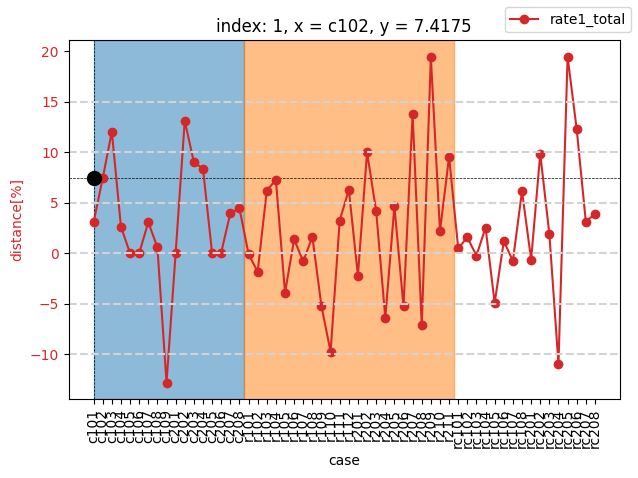

In [10]:
# グラフを描写する
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('case')
ax1.set_ylabel('distance[%]', color=color)
n = len(x_values)
ind = 1    # カーソル位置のインデックス
cur_v = ax1.axvline(x_values[ind], color='k', linestyle='--', linewidth=0.5)
cur_h = ax1.axhline(y1_values[ind], color='k', linestyle='--', linewidth=0.5)
ax1.plot(range(n), y1_values, "o-", picker=15, color=color, label=f'{rate_name}_{group_name}')
plt.xticks(range(n), x_values)
cur_point, = ax1.plot(x_values[ind], y1_values[ind], color='k', markersize=10, marker='o')
ax1.set_title('index: {}, x = {}, y = {}'.format(
                                ind, x_values[ind], round(y1_values[ind], 4)))
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)

# ax2 = ax1.twinx()
# color = 'tab:blue'
# ax2.set_ylabel('elapsed_time[%]', color=color)
# ax2.plot(x_values, y2_values, color=color, label=f'{rate_name}_{group_name}')
# ax2.tick_params(axis='y', labelcolor=color)

# 水平補助線を追加
for i in np.arange(-10, 20, 5):
    ax1.axhline(y=i, color='lightgray', linestyle='--', linewidth=1.5)
    # ax2.axhline(y=20, color='gray', linestyle='-.', linewidth=1.5)



# # x軸の特定の値で垂直線を追加
# specific_x_value1 = c - 0.5  # 追加したい垂直線のx値
# specific_x_value2 = c + r - 0.5
# specific_x_value3 = c + r + rc - 0.5
# vertical_lines = [specific_x_value1, specific_x_value2]
# for line in vertical_lines:
#     plt.axvline(x=line, color='b', linestyle='--', linewidth=1)

# ケースごとに色分け
if group_name == 'total':
    min_values = [0, num_c - 0.5, num_c + num_r - 0.5]
    max_values = [num_c - 0.5, num_c + num_r - 0.5, num_total]
    for i in range(len(min_values)-1):
        ax1.axvspan(min_values[i], max_values[i], color=f'C{i}', alpha=0.5)

def on_key(event):
    global ind
    if event.key == 'right':
        move = 1
    elif event.key == 'left':
        move = -1
    else:
        return

    # インデックスの更新
    ind += move
    ind %= n  # グラフの端に行くと戻るようにする

    # カーソルとタイトルの更新
    cur_v.set_xdata(x_values[ind])
    cur_h.set_ydata(y1_values[ind])
    cur_point.set_data(x_values[ind], y1_values[ind])
    ax.set_title('index: {}, x = {}, y = {}'.format(
                                    ind, x_values[ind], round(y1_values[ind], 4)))
    plt.draw()

fig.canvas.mpl_connect('key_press_event', on_key)


fig.tight_layout()
fig.legend(loc="upper right")
plt.show()

In [20]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df['case'],
            y=df['TOTALCOST'],
            mode='markers+lines',
            opacity=0.5,
            showlegend=False,              
            visible=True,
            # textposition='top center',
            # texttemplate='%{y:.2f}',
            textfont=dict(size=15),
            hoverlabel=dict(bgcolor='#0000ff',
                            bordercolor='#4682b4',
                            font=dict(color='#FFFFFF'),
                            ),
            line=dict(color='#87cefa'),
            name='distance'))

In [ ]:
    fig = px.scatter(
    data_frame=df,
    x='case',
    y='TOTALCOST',
    # color='カテゴリ',
    # animation_frame='オーダー日（年）',
    title='ROC of Total Cost[%]'
    )
    # # axvspanに相当する箇所を追加
    # fig.add_vrect(
    #     x0="c101", x1="c108",
    #     fillcolor="LightSalmon", opacity=0.5,
    #     layer="below", line_width=0,
    # )

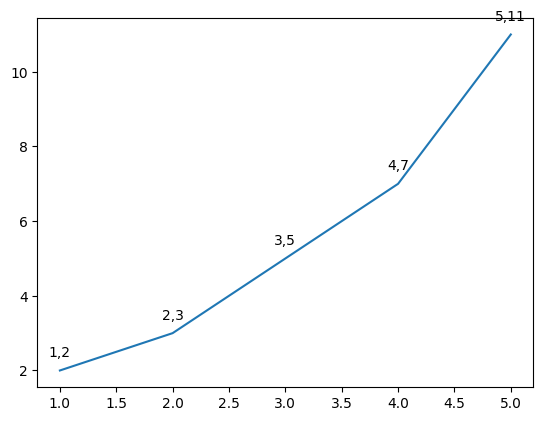

: 

In [ ]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

print(enumerate(y))

fig, ax = plt.subplots()
ax.plot(x, y)

for i, txt in enumerate(y):
    ax.annotate(f'{x[i]},{y[i]}', (x[i], y[i]), textcoords="offset points", xytext=(0,10), ha='center')

plt.show()